In [26]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D





In [27]:
def plot(r):
    #3D plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection = '3d')

    #plot trajectory and starting point
    ax.plot(r[:,0],r[:,1],r[:,2],'k')
    ax.plot([r[0,0]],[r[0,1]],[r[0,2]],'ko')

    r_plot = earth_radius

    #plot earth
    _u,_v = np.mgrid[0:2*np.pi:20j,0:np.pi:10j]
    _x = r_plot*np.cos(_u)*np.sin(_v)
    _y = r_plot*np.sin(_u)*np.sin(_v)
    _z = r_plot*np.cos(_v)
    ax.plot_surface(_x,_y,_z,cmap ="Blues")

    l = r_plot*2.0
    x,y,z = [[0,0,0],[0,0,0],[0,0,0]]
    u,v,w = [[1,0,0],[0,1,0],[0,0,1]]
    ax.quiver(x,y,z,u,v,w,color = 'k')

    max_val = np.max(np.abs(r))
    ax.set_xlim([-max_val,max_val])
    ax.set_ylim([-max_val,max_val])
    ax.set_zlim([-max_val,max_val])
    ax.set_xlabel('X (km)'); ax.set_ylabel('Y (km)'); ax.set_zlabel('Z(km)')
    ax.set_aspect('auto')
    plt.legend(['Trajectory','Starting Position'])
    plt.show()

    

In [28]:
#Initialization
earth_radius = 6378.0
earth_mu = 398600.0

In [29]:
#Kita ingin mencari turunan dari fungsi (percepatan)
def diffy_q(t,y,mu):
    #unpack the states that we need
    rx,ry,rz,vx,vy,vz=y
    r = np.array([rx,ry,rz])
    
    #norm of the radius vector
    norm_r = np.linalg.norm(r)

    #two body acceleration
    ax,ay,az= -r*mu/norm_r**3 #Ini pangkat 3 karena kita punya bentuk mu/|r|^2 * r/|r|

    return [vx,vy,vz,ax,ay,az]
    


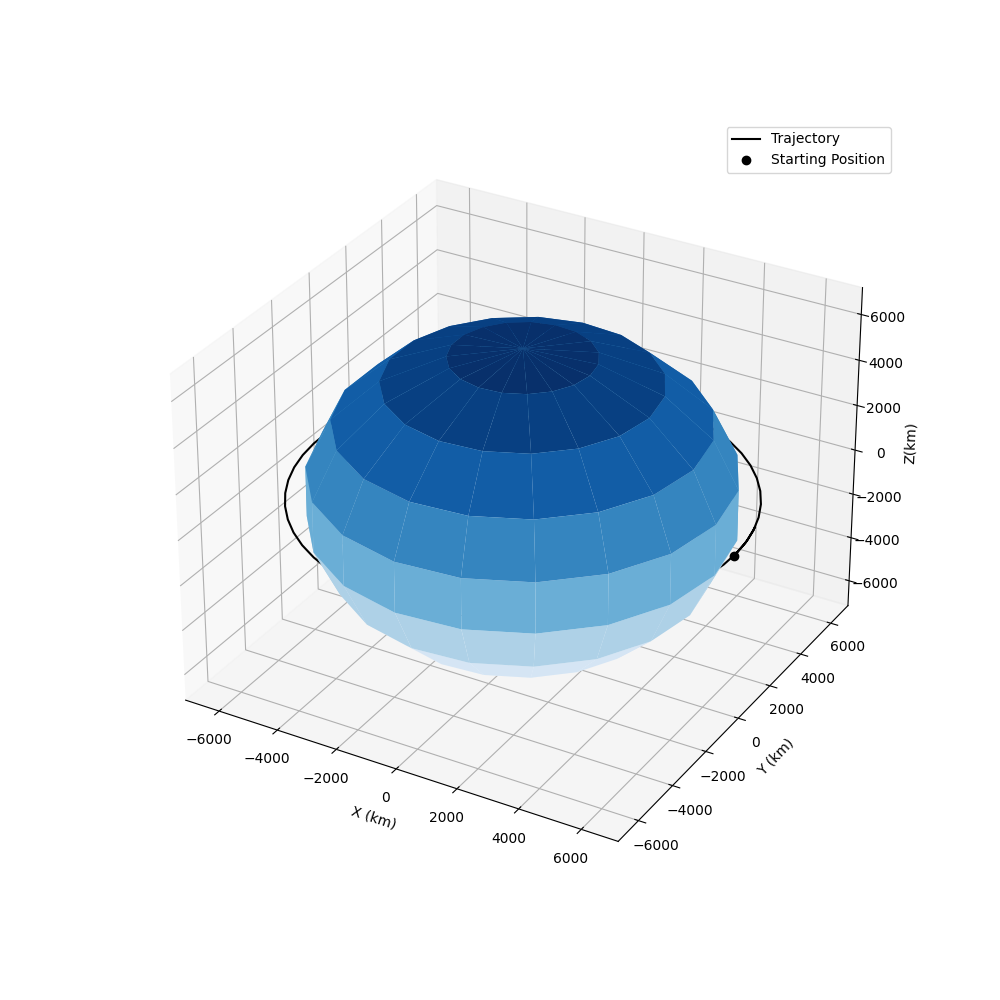

In [30]:
#the main part of the code
if __name__ == "__main__":
    #Initial condition
    r_mag = earth_radius+500
    v_mag = np.sqrt(earth_mu/r_mag)

    #initial position and velocity vectors
    r0 = [r_mag,0,0]#it's a python list, that is because we want to add the lists together
    v0 = [0,v_mag,0]

    #timespan
    tspan = 100*60.0

    #timestep
    dt = 100.0

    #total number of steps:
    n_steps = int(np.ceil(tspan/dt))

    #initialize arrays
    ys = np.zeros((n_steps,6))
    ts = np.zeros((n_steps,1))

    #initial conditions
    y0 = r0 + v0 #because both of them are lists, they will combine instead of adding up the components
    ys[0] = np.array(y0)
    step = 1 #because we want the next state to fill in 1

    #initiate solver
    solver = ode(diffy_q)
    solver.set_integrator('lsoda')
    solver.set_initial_value(y0,0)
    solver.set_f_params(earth_mu)

    #propagate orbit
    while solver.successful() and step<n_steps:
        solver.integrate(solver.t + dt)
        ts[step] = solver.t
        ys[step] = solver.y
        step+=1

    rs = ys[:,:3]

   
    plot(rs)
    

